<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
path_to_dataset = '/content/drive/MyDrive/Data_prepared_final.csv'
pd_dataset = pd.read_csv(path_to_dataset)

In [ ]:
pd_dataset

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [ ]:
pd_arr= np.asarray(pd_dataset)
pd_arr

array([[ 0.00000000e+00,  4.51815240e+04, -4.14000000e+02, ...,
         1.12977779e+00,  4.40299451e-01,  2.05993533e+00],
       [ 1.00000000e+00,  4.51821290e+04, -4.14000000e+02, ...,
         1.05000997e+00,  4.31240499e-01,  1.81505251e+00],
       [ 2.00000000e+00,  4.51825500e+04, -4.14000000e+02, ...,
         9.89473283e-01,  4.47789669e-01,  1.76205266e+00],
       ...,
       [ 1.91970000e+04,  5.42467700e+04,  2.16000000e+02, ...,
         1.09022748e+00,  1.46859932e+00,  2.38201904e+00],
       [ 1.91980000e+04,  5.42473790e+04,  2.16000000e+02, ...,
         9.99380708e-01,  1.49768138e+00,  2.28397584e+00],
       [ 1.91990000e+04,  5.42479600e+04,  2.16000000e+02, ...,
         9.95196104e-01,  1.40411401e+00,  2.23717594e+00]])

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(pd_arr[:,2:])
data_std

array([[-0.10218242, -0.11905909,  0.68430902, ..., -0.42776025,
        -1.48754722, -0.97623555],
       [-0.10218242, -0.12510636,  0.55147287, ..., -0.75935883,
        -1.49722643, -1.28171204],
       [-0.10218242, -0.11895637,  0.3717129 , ..., -1.01101267,
        -1.47954415, -1.34782615],
       ...,
       [ 1.42819676,  1.42668032,  0.55546696, ..., -0.59217272,
        -0.38884086, -0.57445562],
       [ 1.42819676,  1.42326867,  0.09704912, ..., -0.96982704,
        -0.35776759, -0.69675858],
       [ 1.42819676,  1.4243443 ,  0.40553964, ..., -0.98722263,
        -0.45774141, -0.75513862]])

In [ ]:
def initialize_clusters(features, k_clusters):

    row_indexes = np.random.choice(features.shape[0], size = k_clusters , replace = False)

    initial_clusters = features[row_indexes, :]

    return initial_clusters

In [17]:
num_of_transmitter=30
ini_clusters = initialize_clusters(data_std,num_of_transmitter)

In [18]:
def calculate_metric(features, centroid) :




    distances_array = np.square(norm(features - centroid, axis = 1))


    return distances_array

In [19]:
calculate_metric(data_std, ini_clusters[1])

array([15.97857318, 18.18899209, 19.74302534, ...,  7.43644681,
        7.82076853,  8.65716721])

In [20]:
def compute_distances(features, centroids_points) :

    distances_array = np.asarray([calculate_metric(features,centroid) for centroid in centroids_points])

    return distances_array

In [21]:
distances = compute_distances(data_std,ini_clusters)

In [22]:
def assign_centroids(distances):


    assigned_centroids = np.argmin(distances, axis = 0)

    return assigned_centroids

In [23]:
assigned_centroid = assign_centroids(distances)

assigned_centroid

array([12, 12, 12, ..., 13, 27, 27])

In [24]:
def calculate_objective(assigned_centroids, distances):

    objective_function_value = 0.0
    n = assigned_centroids.shape[0]
    for i in range (n):
      column = distances[:,i]
      objective_function_value = objective_function_value + column[assigned_centroids[i]]

    return objective_function_value

In [25]:
calculate_objective(assigned_centroid,distances)

24198.576046341514

In [26]:
def calculate_new_centroids(features, assigned_centroids, k_clusters):

    new_clusters = np.zeros((k_clusters, features.shape[1]))

    for cluster_index in range(k_clusters):
        cluster_indices = np.where(assigned_centroids == cluster_index)[0]

        cluster_points = features[cluster_indices,:]

        new_cluster_point = np.mean(cluster_points, axis=0)

        new_clusters[cluster_index,:] = new_cluster_point

    return new_clusters

In [27]:
calculate_new_centroids(data_std,assigned_centroid,num_of_transmitter)

array([[ 5.32642741e-01,  5.33505551e-01,  6.27800296e-01,
         5.83696846e-01,  4.55574298e-01,  9.63685640e-01,
         5.66900631e-02,  3.05037046e-01,  2.10780434e-01],
       [-3.40372297e-02, -3.59768318e-02, -1.86592577e-01,
         5.79200700e-01,  2.87628107e-02,  9.70909178e-01,
         8.08785145e-02,  3.16684276e-01,  2.39202760e-01],
       [ 7.25872043e-01,  7.60553407e-01, -1.19098084e+00,
         9.95909713e-01, -1.36279090e+00, -1.63539947e+00,
         2.92728455e-01,  1.08603751e+00,  9.27826838e-01],
       [-5.74934160e-02, -5.87489006e-02, -1.87727862e+00,
         1.04691596e+00, -1.81070617e+00, -1.67624592e+00,
         1.40701789e+00,  1.83734305e+00,  1.86736652e+00],
       [-4.16550947e-01, -4.43979822e-01,  2.59866476e-01,
        -2.08678972e+00,  1.05440506e+00, -6.15402549e-03,
        -8.51954346e-01, -1.39165311e+00, -1.24684074e+00],
       [-1.87031693e+00, -1.85643140e+00,  7.20653400e-01,
        -8.06865686e-01,  8.79464431e-01,  2.722121

In [28]:
def fit(features, k_clusters, n_of_iterations, error):
    centroid_points = initialize_clusters(features, k_clusters)
    last_objective = np.inf

    for iteration in range(n_of_iterations):

        distances = compute_distances(features, centroid_points)

        assigned_centroids = assign_centroids(distances)

        objective_value = calculate_objective(assigned_centroids, distances)

        new_centroids = calculate_new_centroids(features, assigned_centroids, k_clusters)

        if abs(objective_value - last_objective) < error:
            break

        centroid_points = new_centroids

        last_objective = objective_value

    return centroid_points, last_objective

In [30]:
fit(data_std, num_of_transmitter, 1000, 0.0001)

(array([[-2.06972849e-01, -2.07281988e-01,  1.00972640e+00,
         -1.30188863e-01,  3.92282445e-01,  5.31370398e-01,
         -1.00779072e-01, -4.70880372e-01, -4.19186831e-01],
        [-1.45789620e+00, -1.45888319e+00,  1.18581569e+00,
         -6.21669097e-01,  8.51580565e-01,  3.12202558e-01,
         -7.00673665e-02, -9.04072389e-01, -6.60682611e-01],
        [-1.74757059e+00, -1.74932905e+00,  8.37727407e-01,
         -7.49620731e-01,  8.67420702e-01,  2.85220898e-01,
         -7.09322977e-01, -9.47151006e-01, -9.69185383e-01],
        [ 5.05606027e-01,  5.07592439e-01,  5.56416444e-01,
         -7.00855966e-01,  2.44297249e-01,  3.17072815e-01,
         -2.68273298e-01, -8.77252356e-01, -7.49465200e-01],
        [-1.27361406e+00, -1.26066854e+00,  8.04347332e-01,
         -6.78812748e-01,  8.46759149e-01,  3.11525326e-01,
         -8.64645894e-01, -8.99761090e-01, -1.02322851e+00],
        [ 2.30662408e+00,  2.30559305e+00,  8.23673178e-01,
          1.57012033e-01,  6.287980

In [42]:
num_of_transmitters = range(2, 35)
all_objective = []
for i in num_of_transmitters:
  all_objective.append(fit(data_std, i, 100, 0.001)[1])

Text(0, 0.5, 'Objective function values')

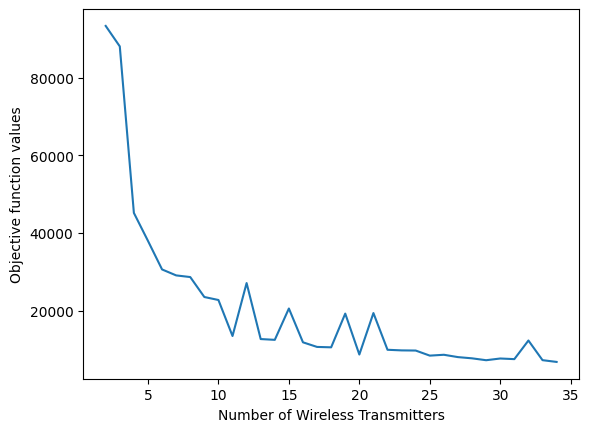

In [47]:
plt.figure()
plt.plot(num_of_transmitters, all_objective)
plt.xlabel('Number of Wireless Transmitters')
plt.ylabel('Objective function values')

In [49]:
def plot_silhouette_scores(data, k_range):
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Wireless Transmitters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Method for determining the number of wireless transmitters')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

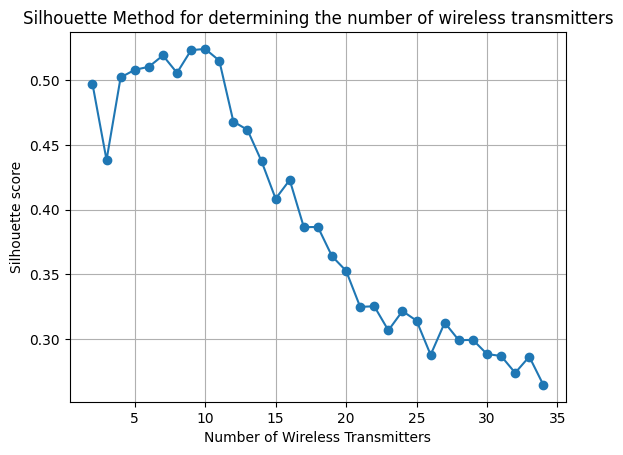

In [50]:
num_of_transmitters = range(2, 35)
plot_silhouette_scores(data_std, num_of_transmitters)